In [1]:
# required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning and Preparation: 

In [2]:
# load the data from the source
cardio_data = pd.read_csv('/DataScienceNotes/Assignments/05-EDA/Cardiotocographic.csv')
cardio_data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
# cardio_data.columns

In [4]:
# get the data range and any null values in column
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
# null values per column
# cardio_data.isna().sum()

In [6]:
# Identifying the numerical column and,
# check the min, max, standerd diviation, mean and quaterly values 
cardio_data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [7]:
# make a copy of original data and process
cd_data = cardio_data.copy()

In [8]:
# check the duplicate rows
cd_data[cd_data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [9]:
# remove duplicate rows
cd_data.drop_duplicates(inplace=True)

In [10]:
# confirm the duplicate rows 
cd_data[cd_data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP


In [11]:
# find null values per column
cd_data.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

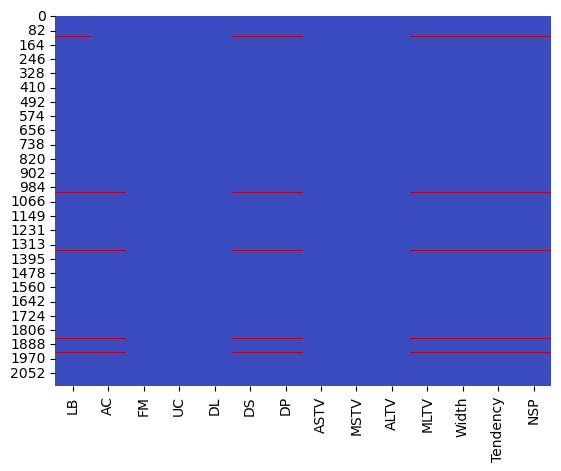

In [12]:
# show null values using heatmap
sns.heatmap(cd_data.isna(), cbar=False, cmap='coolwarm')
plt.show()

<Figure size 1200x400 with 0 Axes>

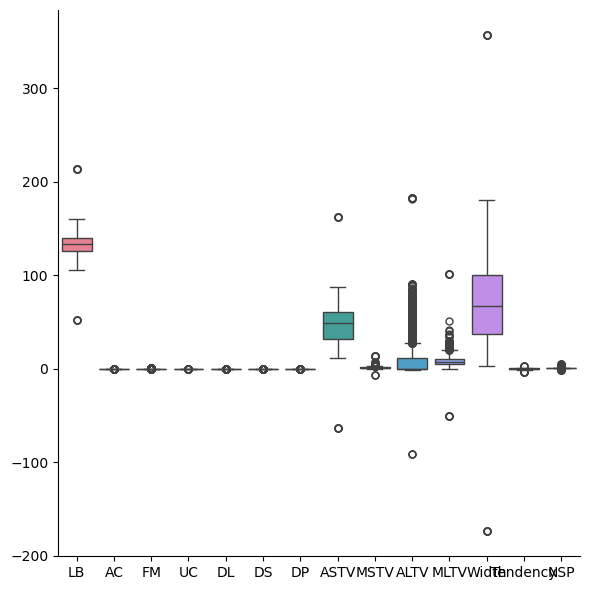

In [13]:
# Handling outliers
plt.figure(figsize=(12, 4))
sns.catplot(cd_data, kind='box', height=6)
plt.show()

Variables like ASTV, ALTV, &MLTV show visible outliers

Outliers are medically meaningful and should not be removed blindly

Retaining outliers for analysis.

In [14]:
# get each column mean vlaue and round it
rounded_means = cd_data.mean().round()

In [15]:
# fill null values with rounfded means
cd_data.fillna(rounded_means, inplace=True)

In [16]:
# verifying null values
# cd_data.isna().sum()

In [17]:
cd_data.shape

(2124, 14)

### Statistical Summary: 

In [18]:
cd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2124.0,133.338641,11.212447,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2124.0,0.003189,0.004382,-0.019284,0.000000,0.001572,0.005612,0.038567
FM,2124.0,0.009904,0.067571,-0.480634,0.000000,0.000000,0.002568,0.961268
UC,2124.0,0.004394,0.003340,-0.014925,0.001858,0.004486,0.006536,0.030002
DL,2124.0,0.001897,0.003344,-0.015393,0.000000,0.000000,0.003292,0.030769
DS,2124.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2124.0,0.000174,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2124.0,47.012459,18.812403,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2124.0,1.364345,1.174084,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2124.0,10.295650,21.212676,-91.000000,0.000000,0.000000,11.000000,182.000000


In [19]:
cd_data.quantile(0.75) - cd_data.quantile(0.25)

LB          14.000000
AC           0.005612
FM           0.002568
UC           0.004678
DL           0.003292
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

LB (Baseline FHR) centers around a medically normal range

ASTV & ALTV show high variability - potential indicators of fetal stress

MSTV & MLTV values are tightly clustered - stable variability measures

### Data Visualization: 

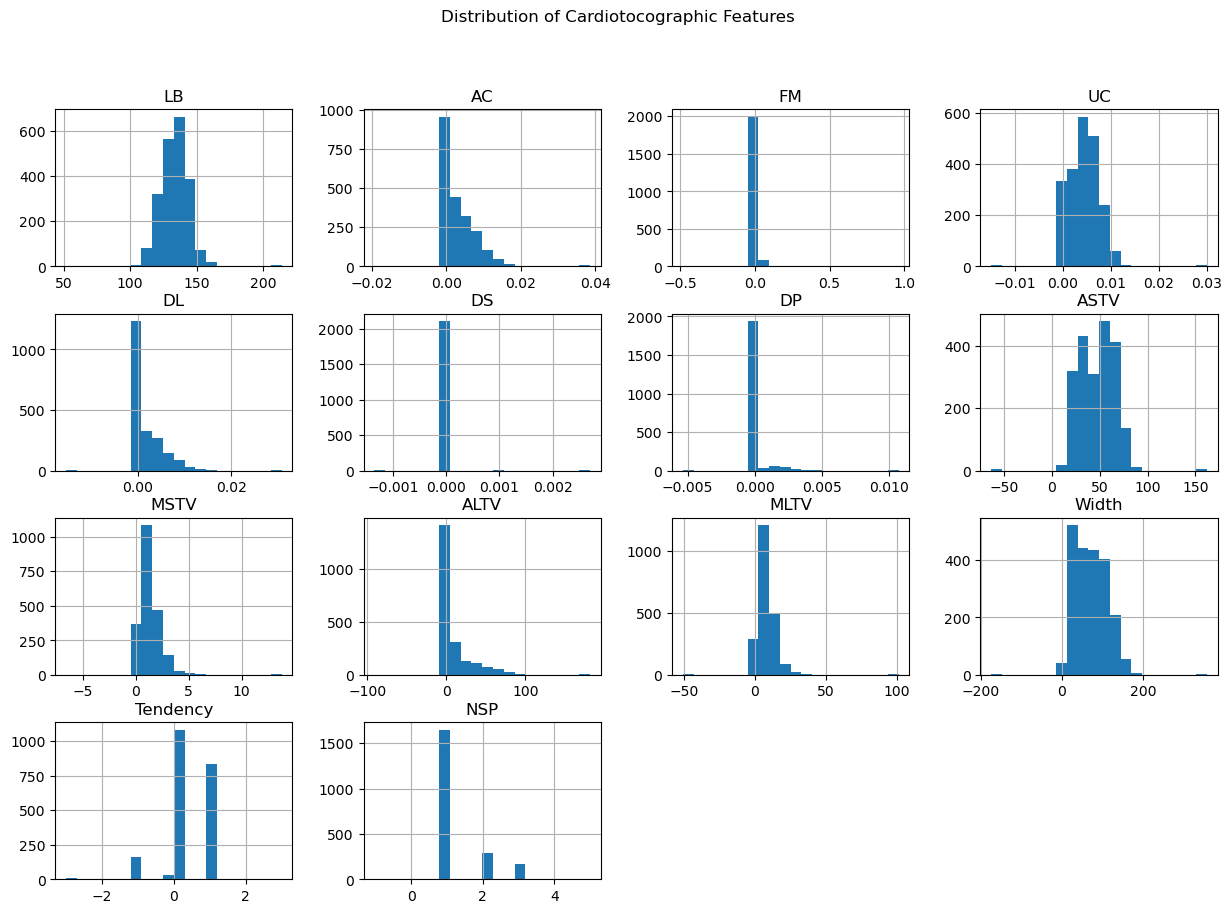

In [20]:
# distribution analysis using histogram
cd_data.hist(figsize=(15,10), bins=20)
plt.suptitle("Distribution of Cardiotocographic Features")
plt.show()


Several variables are right-skewed

Variability features show clustered distributions

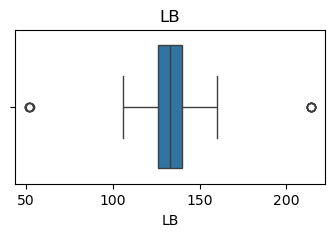

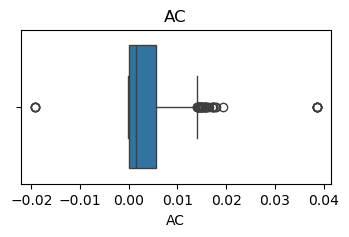

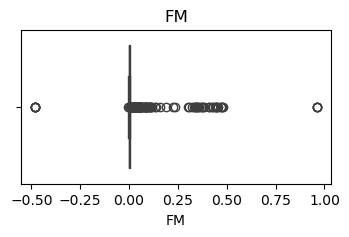

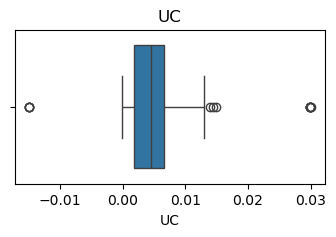

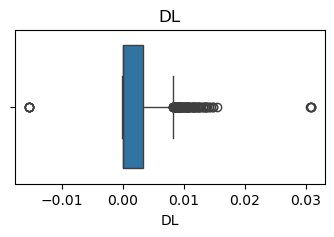

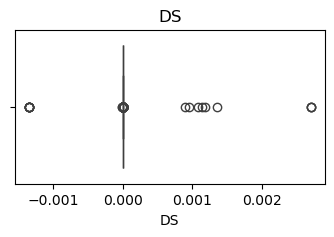

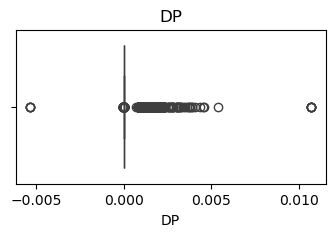

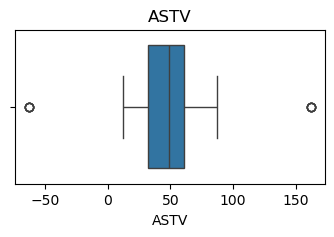

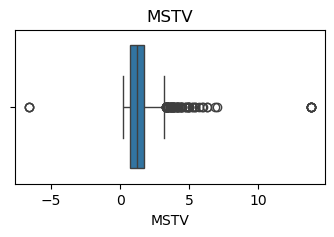

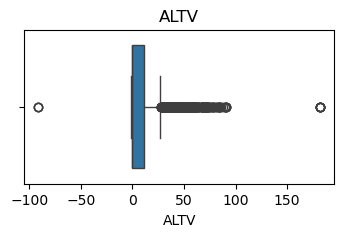

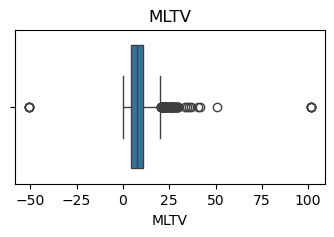

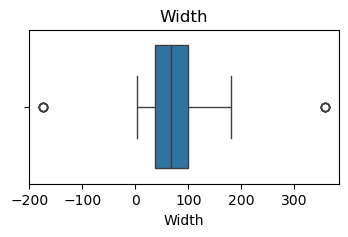

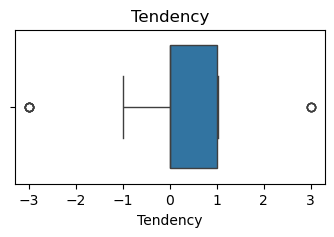

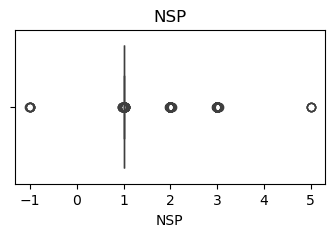

In [21]:
# box plots spread and outliers
for col in cd_data.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=cd_data[col])
    plt.title(col)
    plt.show()

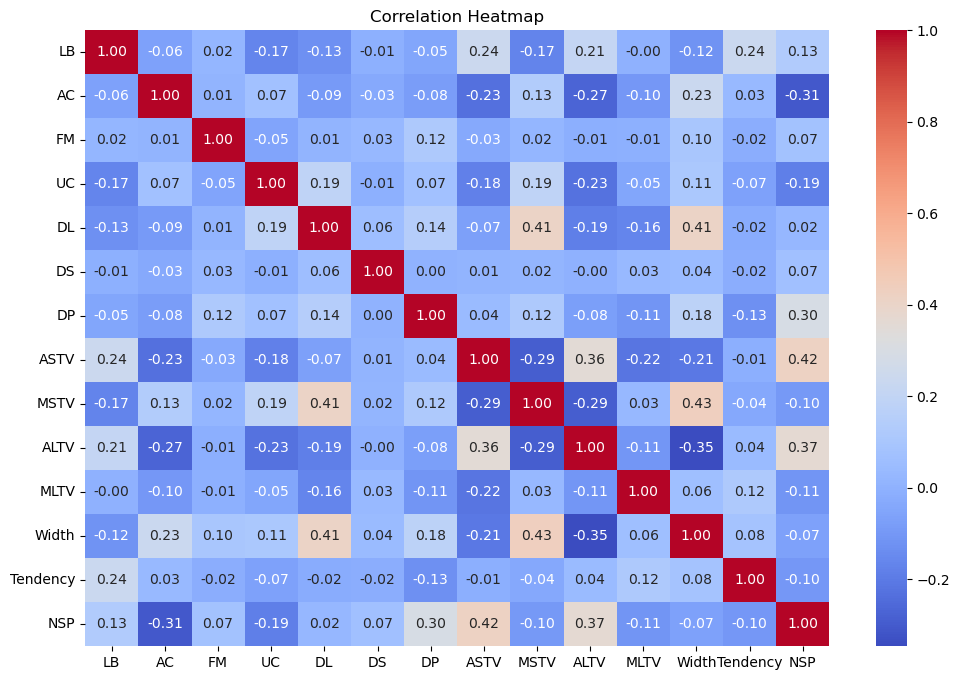

In [22]:
# correlation heat map
plt.figure(figsize=(12,8))
sns.heatmap(cd_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

ASTV - MSTV : strong negative relationship

ALTV - MLTV : meaningful association

UC - DL : uterine contractions linked to decelerations

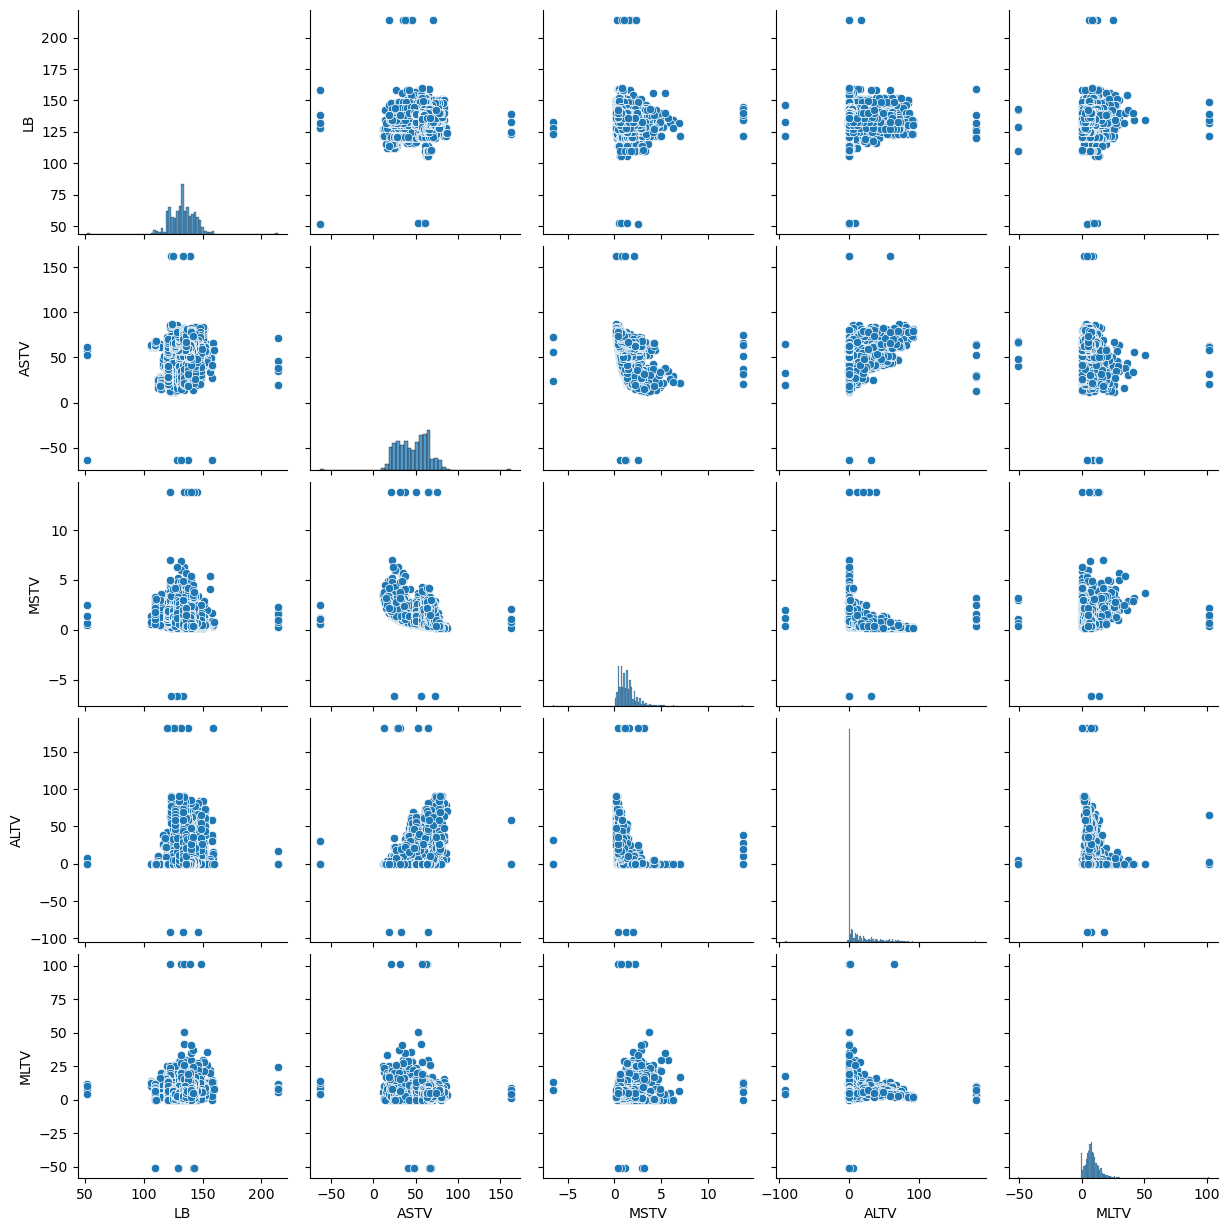

In [23]:
# advanced visulization using pair plot
sns.pairplot(cd_data[['LB','ASTV','MSTV','ALTV','MLTV']])
plt.show()

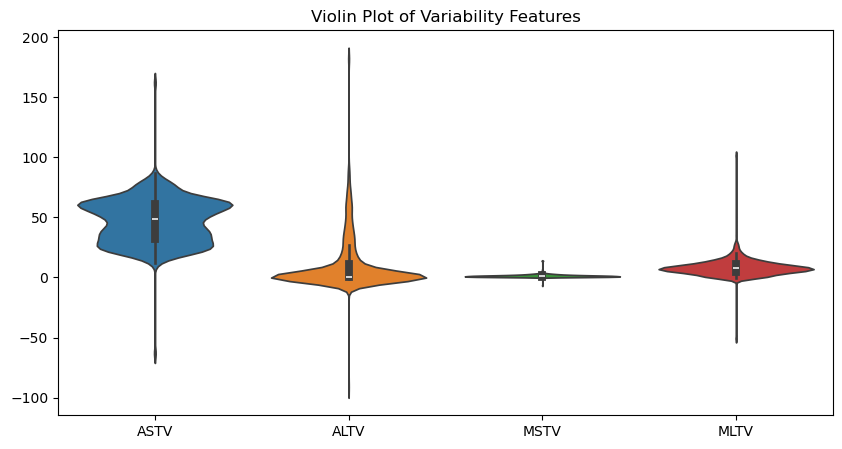

In [24]:
# violin plot
plt.figure(figsize=(10,5))
sns.violinplot(data=cd_data[['ASTV','ALTV','MSTV','MLTV']])
plt.title("Violin Plot of Variability Features")
plt.show()

ASTV and ALTV show wider distributions - higher instability

### Pattern Recognition and Insights

#### observerd pattern

High ASTV / ALTV - Possible fetal distress indicators

Higher UC values - Increased decelerations (DL, DP)

Stable MSTV & MLTV - Healthy variability patterns

#### Medical Implications

Abnormal variability metrics could be early warning signs

Correlated features may be strong predictors in ML models

#### Conclusion: 

Dataset is clean and well-structured

Strong relationships exist among variability metrics

Outliers are clinically meaningful

Variability features provide the most insight

Impact on Decision-Making

Supports early diagnosis of fetal distress

Useful for building classification models

Helps clinicians monitor risk factors effectively
